<a href="https://colab.research.google.com/github/cmgospod/DS-Unit-2-Regression-Classification/blob/master/module2/assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.
- [ ] Add your own stretch goal(s) !

In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.1)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [4]:
from sklearn.cluster import KMeans
df.created = pd.to_datetime(df.created)
# Changing the date to a proper date format
train = df[df['created'] < '2016-06-01']
test = df[df['created'] > '2016-06-01']
print(train.shape)
print(test.shape)
print(train.shape[0] + test.shape[0])
print(df.shape)

(31844, 34)
(16973, 34)
48817
(48817, 34)


In [0]:
location = train[['latitude', 'longitude', 'price']]
sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(location)
    sum_of_squared_distances.append(km.inertia_)
# Exploring clusters in physical location

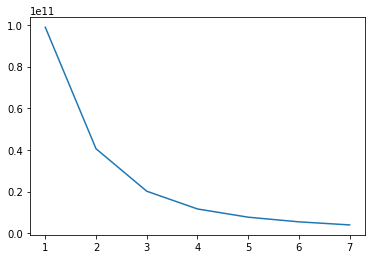

In [6]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances)
# Elbow plot: three seems like a good number

In [7]:
n_clusters = 5
kmean = KMeans(n_clusters=n_clusters)
kmean.fit(location)
labels = kmean.labels_
label_series = pd.Series(labels)
location['clusters'] = label_series.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
mean_list = []
for cluster in range(0,n_clusters):
  clust = location[location['clusters'] == cluster]
  cluster_mean = np.mean(clust['price'])
  mean_list.append(cluster_mean)
# Making a list of means to help order the clusters


In [9]:
for i in range(0,n_clusters):
  richest = max(mean_list)
  mansion = mean_list.index(richest)
  location['clusters'] = location['clusters'].replace({mansion:i+n_clusters+1})
#   Replaces the initial cluster numbers with one ordered by mean price and
#   transforms it to avoid getting picked up multiple times
  mean_list[mean_list.index(richest)] = -1

location['clusters'] = location['clusters'].apply(lambda a: a-1-n_clusters)
# Reverts the transformation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:

train['neighborhood'] = location['clusters']
train['pets_allowed'] = train['cats_allowed'] + train['dogs_allowed']
train.pets_allowed = np.sign(train.pets_allowed)
# pets_allowed measures whether either dogs or cats are allowed
train.interest_level = train.interest_level.replace(to_replace={'high':3,'medium':2,'low':1})
# Making interest_level numeric
def isreal(descrip):
  return len(str(descrip))
train['desc'] = train.description.map(isreal)
# Taking the length of the description


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [11]:
test['pets_allowed'] = test['cats_allowed'] + test['dogs_allowed']
test.pets_allowed = np.sign(test.pets_allowed)
# pets_allowed measures whether either dogs or cats are allowed
test.interest_level = test.interest_level.replace(to_replace={'high':3,'medium':2,'low':1})
# Making interest_level numeric
test['desc'] = test.description.map(isreal)
# Taking the length of the description

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [12]:
location = test[['latitude', 'longitude', 'price']]
kmean.fit(location)
labels = kmean.labels_
label_series = pd.Series(labels)
location['clusters'] = label_series.values
mean_list = []
for cluster in range(0,n_clusters):
  clust = location[location['clusters'] == cluster]
  cluster_mean = np.mean(clust['price'])
  mean_list.append(cluster_mean)
for i in range(0,n_clusters):
  richest = max(mean_list)
  mansion = mean_list.index(richest)
  location['clusters'] = location['clusters'].replace({mansion:i+n_clusters+1})
  mean_list[mean_list.index(richest)] = -1
location['clusters'] = location['clusters'].apply(lambda a: a-1-n_clusters)
# Same code as for the training data
test['neighborhood'] = location['clusters']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
features = ['bedrooms', 'bathrooms', 'interest_level', 'pets_allowed', 'desc','neighborhood']
target = 'price'
X = train[features]
Y = train[target]
model.fit(X,Y)
y_pred = model.predict(X)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
testx = test[features]
testy = test[target]
y_test = model.predict(testx)
print(f'The intercept is {model.intercept_}, and the coefficients are {model.coef_}')
print('Mean squared error, mean absolute error, and r2 score')
print(f'Train: {mean_squared_error(Y, y_pred)}, {mean_absolute_error(Y, y_pred)}, {r2_score(Y, y_pred)}')
print(f'Test: {mean_squared_error(testy, y_test)}, {mean_absolute_error(testy, y_test)}, {r2_score(testy, y_test)}')

The intercept is 7275.2546891399015, and the coefficients are [-4.41786335e+01  6.90306480e+02 -9.42040895e+01 -1.92968806e+01
  5.38787602e-02 -1.43164929e+03]
Mean squared error, mean absolute error, and r2 score
Train: 457807.8967631459, 447.8881124659433, 0.8525591831580639
Test: 464574.39922361396, 451.55893984774303, 0.8505240604274873
